### 1. Import the essential libraries

In [1]:
import os
import sys
import cv2
import random
import joblib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

from skimage.color import rgb2lab, lab2rgb
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float

params = {"ytick.color" : "yellowgreen",
          "xtick.color" : "yellowgreen",
          "axes.labelcolor" : "yellowgreen",
          "axes.edgecolor" : "yellowgreen"}
plt.rcParams.update(params)

### 2. Set the paths for *train* and *test* data

In [2]:
# train_images_path = os.path.join("/media/andretri7/WD/Datasets/emilwallner-datasets-colornet-2/images/Train")
# test_images_path  = os.path.join("/media/andretri7/WD/Datasets/emilwallner-datasets-colornet-2/images/Test")
train_images_path = os.path.join("/media/andretri7/WD/Datasets/flower_images/flower_images")

# res_path          = os.path.join('.', 'res')
res_path          = os.path.join('.', 'res_all')

### 2.1. Get the Train Image DataFrame & the Color Palette

In [3]:
colorPalette = joblib.load(os.path.join(res_path, 'colorPalette.joblib'))
type(colorPalette)

sklearn.cluster.k_means_.MiniBatchKMeans

In [4]:
imageDataFrame = pd.read_pickle(os.path.join(res_path, 'pdDataset.pkl'))
imageDataFrame

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,400
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,181.0,1956.0,316.0,394.0,172.0,200.0,108.0,460.0,166.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5612.0,12166.0,7690.0,14526.0,4824.0,13731.0,5649.0,11745.0,3251.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1368.0,7767.0,1173.0,11232.0,1372.0,6685.0,967.0,9086.0,1088.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,892.0,1335.0,293.0,8004.0,1100.0,10780.0,1340.0,12802.0,1502.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,559.0,2832.0,422.0,2823.0,559.0,3146.0,620.0,6414.0,924.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15054.0,15384.0,15678.0,18451.0,14867.0,17601.0,11775.0,11044.0,5068.0,9.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,22106.0,15293.0,13629.0,20214.0,17494.0,20890.0,18386.0,17386.0,19962.0,5.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17415.0,15381.0,9203.0,20350.0,18308.0,19446.0,17480.0,20223.0,14685.0,5.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13121.0,16866.0,11658.0,18973.0,14787.0,20950.0,13652.0,15806.0,22432.0,6.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,816.0,1956.0,360.0,4397.0,779.0,3078.0,696.0,4776.0,840.0,0.0


### 3. Dataset Preprocessing
* #### 3.1. Importing the Essential Libraries
* #### 3.2. Standard Scaling (mean=0, std=1)
* #### 3.3. Dimensionality Reduction 

In [5]:
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score
from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [6]:
pca = PCA(n_components=32, svd_solver='auto', random_state=100)
stdScaler = StandardScaler()

X_scaled = stdScaler.fit_transform(imageDataFrame.iloc[:,:-1].values)
X_pca = pca.fit_transform(X_scaled)

print(f'''\t\t\tPCA Dimensionality Reduction
        \nExplained Variance Ratio:\n{pca.explained_variance_ratio_}
        \nSum: {np.sum(pca.explained_variance_ratio_)}''')  

dataset = pd.DataFrame(np.column_stack((X_pca, imageDataFrame.iloc[:,-1].values)))

			PCA Dimensionality Reduction
        
Explained Variance Ratio:
[4.54567453e-01 2.06785948e-01 1.42516655e-01 1.14454227e-01
 2.23095478e-02 1.00566880e-02 9.00613296e-03 6.11744859e-03
 3.88560327e-03 3.42576602e-03 3.38149757e-03 2.84021062e-03
 1.89758532e-03 1.65182824e-03 1.28693700e-03 1.26523069e-03
 1.00605635e-03 9.59741640e-04 8.91288963e-04 7.26184301e-04
 6.71320484e-04 6.52440457e-04 6.31871851e-04 6.06799984e-04
 5.28874876e-04 4.60533325e-04 4.00535379e-04 3.92380731e-04
 3.61626053e-04 3.44117169e-04 3.34276032e-04 3.21607279e-04]
        
Sum: 0.9947384136261648


In [7]:
dataset.head(10)

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,-10.319095,11.804758,0.893177,-0.379536,0.000642,-0.022061,0.005406,-0.097880,-0.299338,0.944382,...,0.000456,-0.046795,-0.049637,-0.077146,0.006581,-0.033873,-0.115974,0.019803,0.001138,0.0
1,-7.581272,4.408315,0.469618,-0.224139,-0.113405,0.370167,-0.127637,-0.957543,-0.051903,0.766668,...,0.060615,-0.123884,0.016152,-0.140633,0.062054,0.003686,0.001824,-0.054458,0.020931,0.0
2,-9.639541,7.204720,0.755030,-0.371370,-0.067666,-0.308260,0.092004,0.336985,-0.068375,0.059786,...,0.260389,-0.065620,0.046645,-0.315568,-0.077946,-0.066908,0.315440,0.035001,0.037568,0.0
3,-9.745758,7.826526,0.765725,-0.360949,0.798660,-1.612425,0.336324,-0.525103,0.181631,-0.035199,...,-0.076961,-0.000024,-0.120263,-0.064211,0.139859,0.041873,0.138414,-0.070493,0.021821,0.0
4,-10.042393,9.705804,0.827156,-0.365538,0.075319,-1.462192,0.348818,0.766782,-0.253986,0.592544,...,0.017859,-0.083397,0.011824,-0.027396,0.104232,-0.046878,0.074430,0.013923,-0.018324,0.0
5,-5.370992,1.905273,0.162191,-0.052042,0.000087,-0.199933,0.047084,0.272930,-0.217550,0.857709,...,0.090818,-0.102431,0.284247,-0.267833,-0.349683,0.135991,-0.152046,0.054945,0.013942,9.0
6,-3.233842,1.269090,-0.115229,0.120692,0.825127,0.151900,-0.040373,-1.067509,0.206684,0.297540,...,0.077247,0.030029,-0.126465,0.207577,-0.163947,-0.122398,0.280398,-0.218714,0.080895,5.0
7,-4.978841,1.050582,0.097963,-0.026939,-0.097997,0.161233,-0.070870,-1.111374,0.264767,0.124394,...,-0.027538,-0.359534,-0.258200,0.254824,-0.207980,-0.002811,0.148825,0.251814,-0.077084,5.0
8,-4.089218,1.927976,0.005640,0.042650,-0.389559,0.950123,-0.287979,-2.121505,0.342226,0.200252,...,0.258188,0.246346,0.365008,0.318128,0.140417,-0.109650,0.338296,-0.125510,0.008240,6.0
9,-9.983289,9.529132,0.820622,-0.364650,-0.251866,-1.325262,0.297950,0.431459,-0.138845,0.434966,...,0.172029,-0.152640,0.107264,-0.174225,0.002238,0.038694,0.135477,0.013067,0.016677,0.0


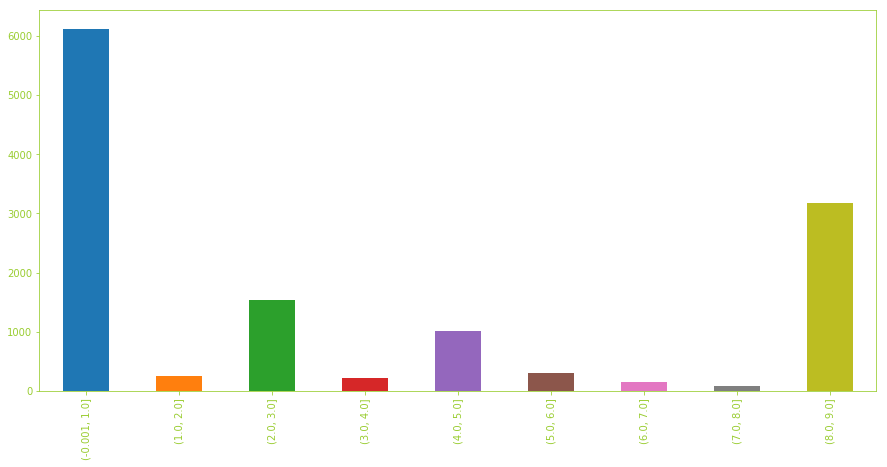

In [8]:
bin_range = np.unique(dataset.iloc[:, -1].values).astype(np.int32)
out, bins  = pd.cut(dataset.iloc[:, -1], bins=bin_range, include_lowest=True, retbins=True)

plt.figure(figsize=(15,7))
out.value_counts(sort=False).plot.bar()
plt.show()

### 4. SVM Training
  * #### One vs All Method (i.e: We need to create as many SVM's as the Colors in our Palette)
  * #### With the help of Repeated k-Fold Validation, for *n_repeats* rounds we:
    * ##### Fragment our dataset to *n_splits* random fragments
    * ##### Train our set of SVMs
    
#### NOTE: Due to few data the k-Fold Validation is actually decreasing the accuracy of the classifier, so we just train the data without it (thus risking to overfit the classifier - something that will be alleviated with the graph cuts)

In [9]:
clf = SVC(kernel='rbf', gamma='scale', cache_size=500, random_state=110)
rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
ovr_clf = OneVsRestClassifier(clf, n_jobs=-1)

X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
accuracy = np.array([])

for train_index, test_index in tqdm_notebook(rkf.split(X), total=25):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    ovr_clf.fit(X_train, y_train)
    acc = ovr_clf.score(X_test,y_test)
    print (f'Accuracy: {acc}')
    accuracy = np.append(accuracy, [acc])

print(f'Max. Accuracy: {np.amax(accuracy)}')
print(f'Min. Accuracy: {np.amin(accuracy)}')

Accuracy: 0.551750972762646
Accuracy: 0.5439688715953307
Accuracy: 0.5704280155642023
Accuracy: 0.5463035019455252
Accuracy: 0.5529595015576324
Accuracy: 0.5716510903426791
Accuracy: 0.5545171339563862
Accuracy: 0.5490654205607477
Accuracy: 0.5358255451713395
Accuracy: 0.5514018691588785
Accuracy: 0.5486381322957199
Accuracy: 0.5260700389105059
Accuracy: 0.5688715953307393
Accuracy: 0.554863813229572
Accuracy: 0.559190031152648
Accuracy: 0.530373831775701
Accuracy: 0.5654205607476636
Accuracy: 0.5389408099688473
Accuracy: 0.5521806853582555
Accuracy: 0.5560747663551402
Accuracy: 0.5680933852140078
Accuracy: 0.5463035019455252
Accuracy: 0.5618677042801556
Accuracy: 0.5377431906614786
Accuracy: 0.5342679127725857
Accuracy: 0.544392523364486
Accuracy: 0.5568535825545171
Accuracy: 0.5568535825545171
Accuracy: 0.5669781931464174
Accuracy: 0.5661993769470405
Accuracy: 0.5665369649805447
Accuracy: 0.5587548638132296
Accuracy: 0.5603112840466926
Accuracy: 0.556420233463035
Accuracy: 0.55841121

# CHECKPOINT
* ### Save the OvR SVM Classifier for the following notebooks

In [10]:
if not os.path.exists(os.path.join('.', 'res_all')):
    os.makedirs(os.path.join('.', 'res_all'))
    
save_path = os.path.join('.', 'res_all')

In [11]:
joblib.dump(ovr_clf, os.path.join(save_path,'TextureColorClassifierOvR.joblib'))

['./res_all/TextureColorClassifierOvR.joblib']

In [12]:
joblib.dump(pca, os.path.join(save_path,'DecompositionPCA.joblib'))

['./res_all/DecompositionPCA.joblib']

In [13]:
joblib.dump(stdScaler, os.path.join(save_path,'stdScaler.joblib'))

['./res_all/stdScaler.joblib']